# Variable Transformation

Variable transformation is a way to make the data work better in your model. 

Variable Transformation includes:
    - categorical encoding - encode categorical variables for modeling
    - gaussian transformation - use if numerical variable not normally distributed to normalize
    - discretisation - transform continous variables into discrete (ie change into a set of intervals)
    - feature scaling - change variables so all their ranges are within a similar scale
    - engineering mixed variables - contain both numbers & labels
    - cardinality - # of different values
    - rare labels - value that doesn't occur very often

## 1. Categorical Encoding

The following reviews methods for transforming CATEGORICAL variables.

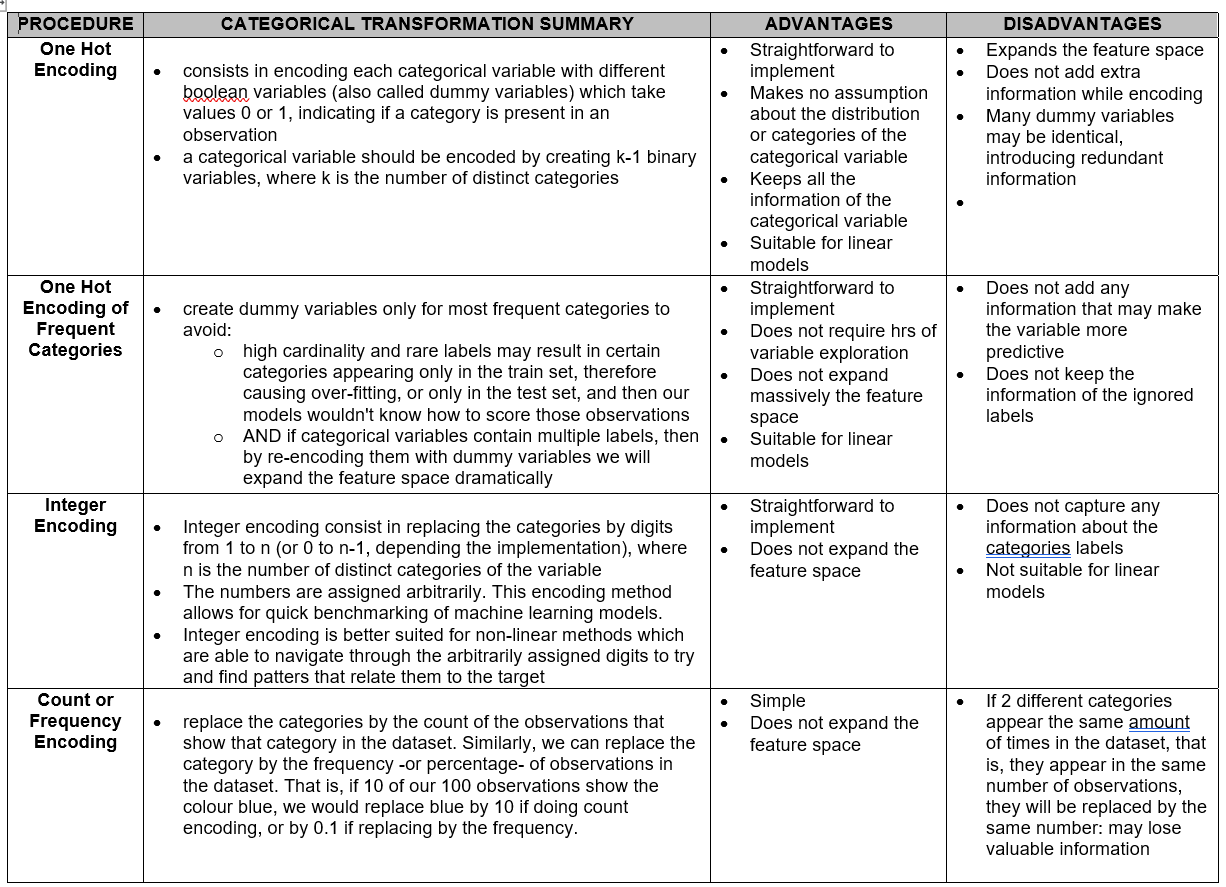

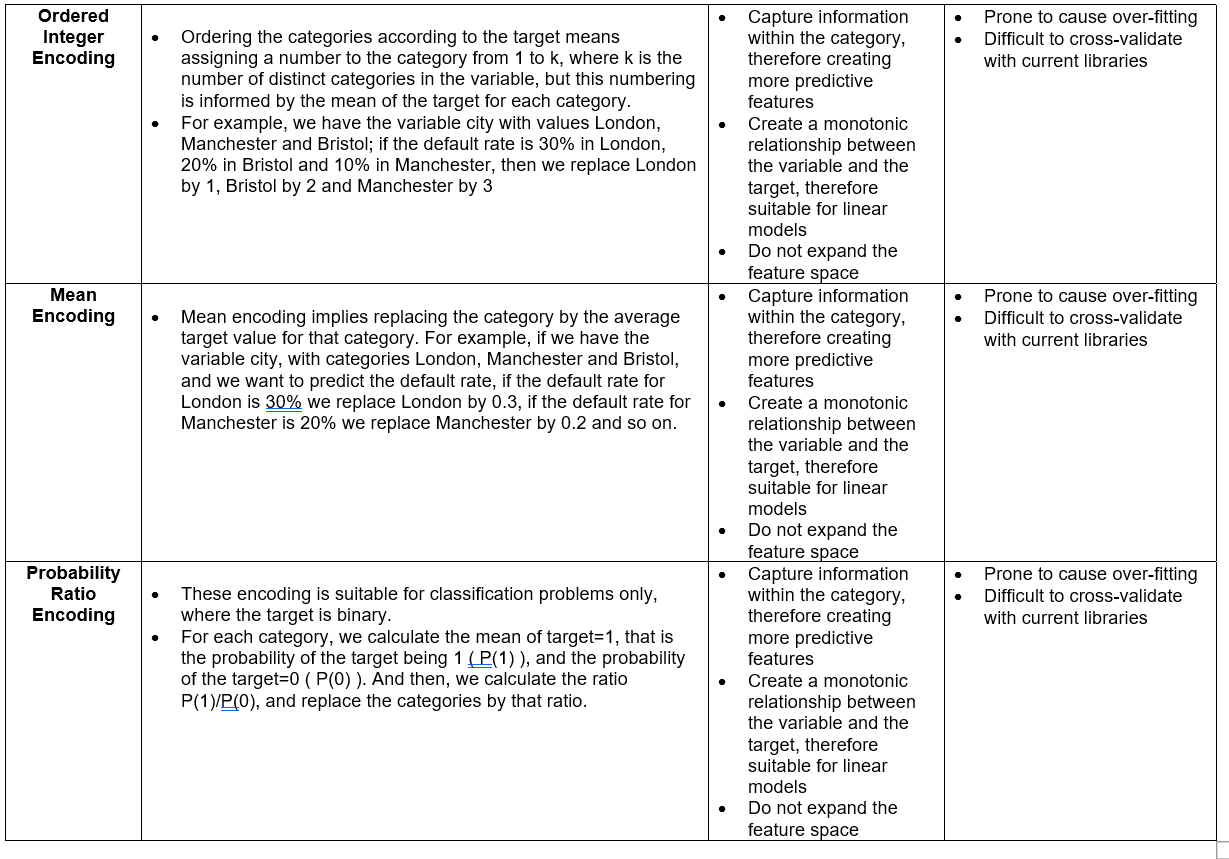

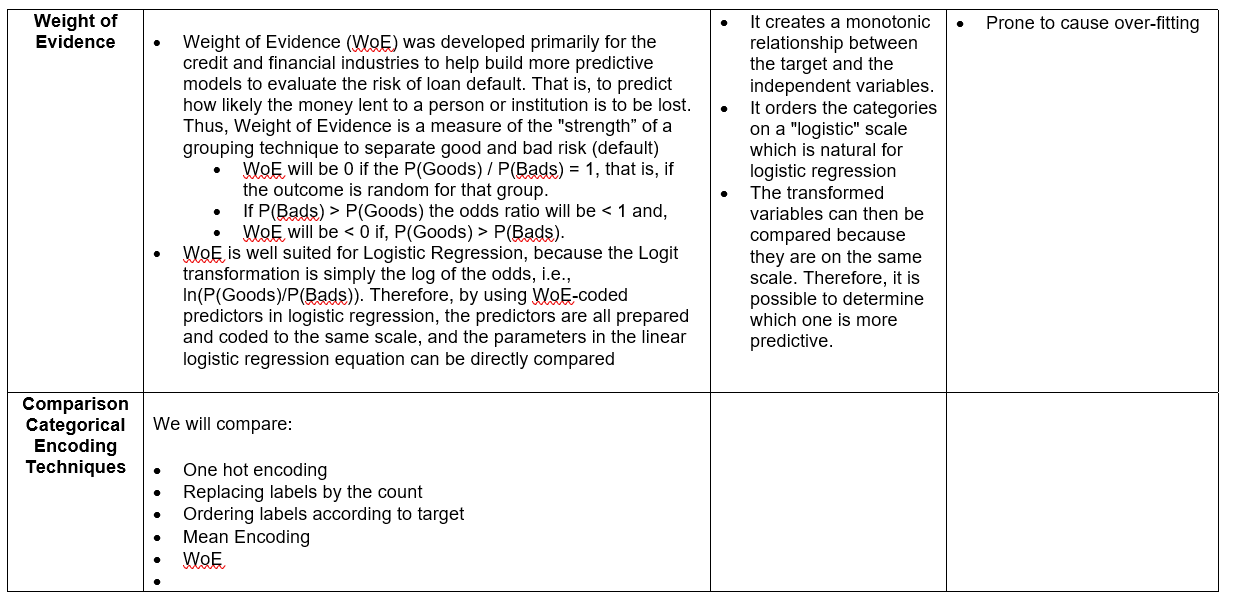

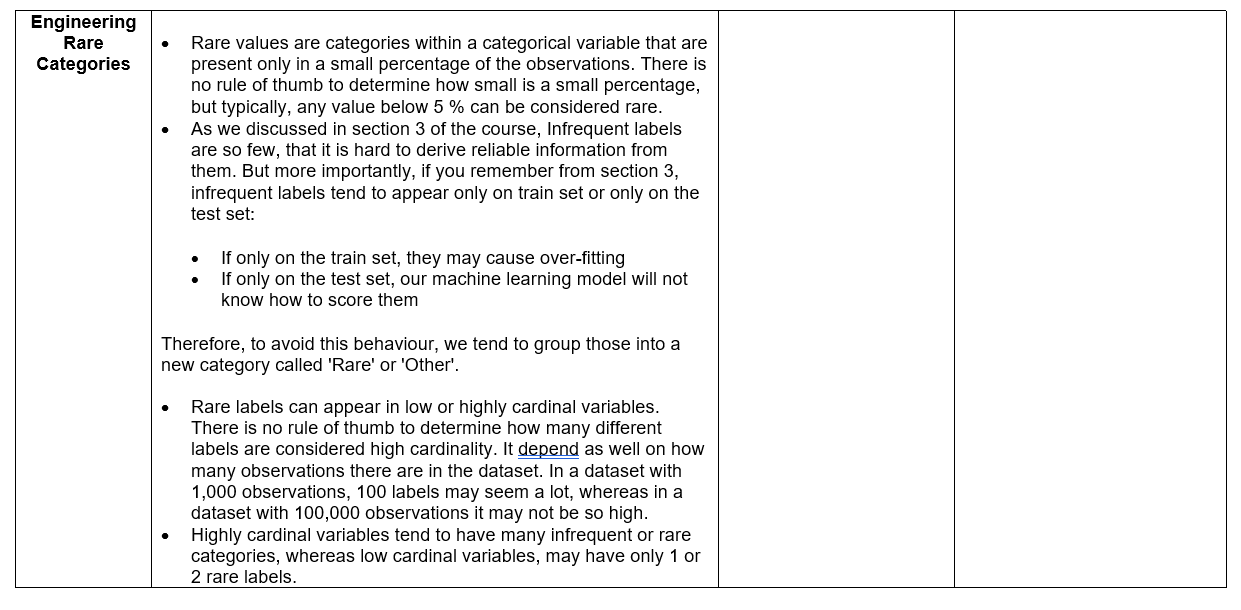

## 2. Gaussian Transformation

Some machine learning models like linear and logistic regression assume that the variables are normally distributed. Often, variables are not normally distributed, but, transforming the variables to map their distribution to a Gaussian distribution may, and often does, boost the performance of the machine learning algorithm.

If a variable is not normally distributed, it is often  possible to find a mathematical transformation to normalise its distribution.

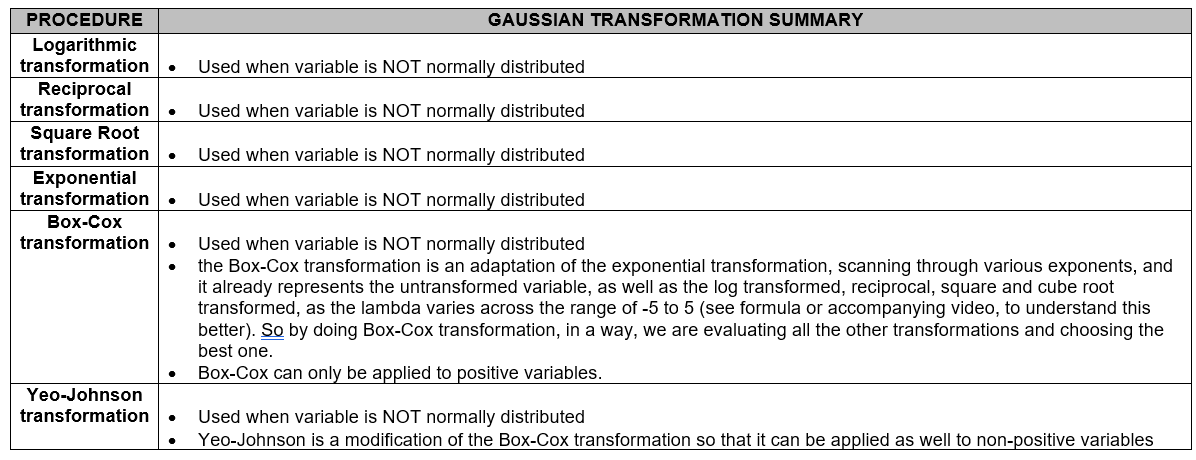

## 3. Discretisation

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretisation is also called **binning**, where bin is an alternative name for interval.


### Discretisation helps handle outliers and may improve value spread in skewed variables

Discretisation helps handle outliers by placing these values into the lower or higher intervals, together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations.


### Discretisation approaches

There are several approaches to transform continuous variables into discrete ones. Discretisation methods fall into 2 categories: **supervised and unsupervised**. Unsupervised methods do not use any information, other than the variable distribution, to create the contiguous bins in which the values will be placed. Supervised methods typically use target information in order to create the bins or intervals.

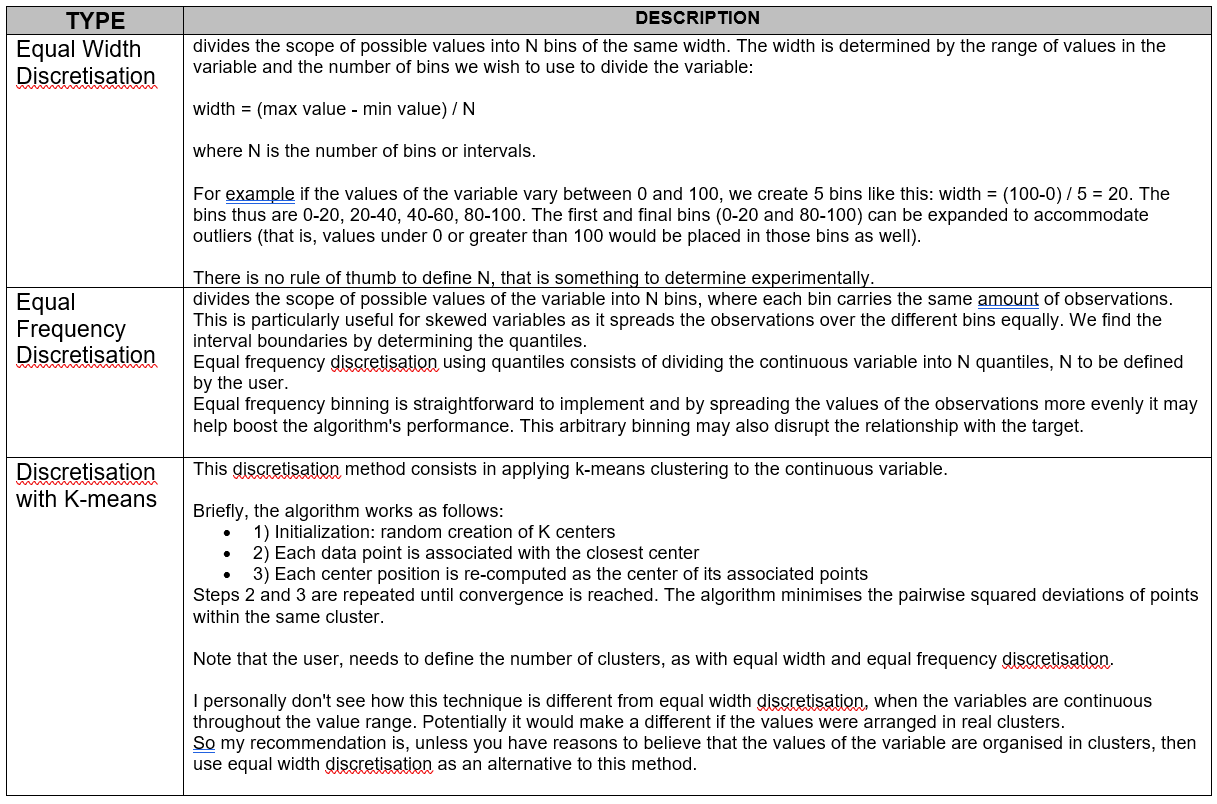

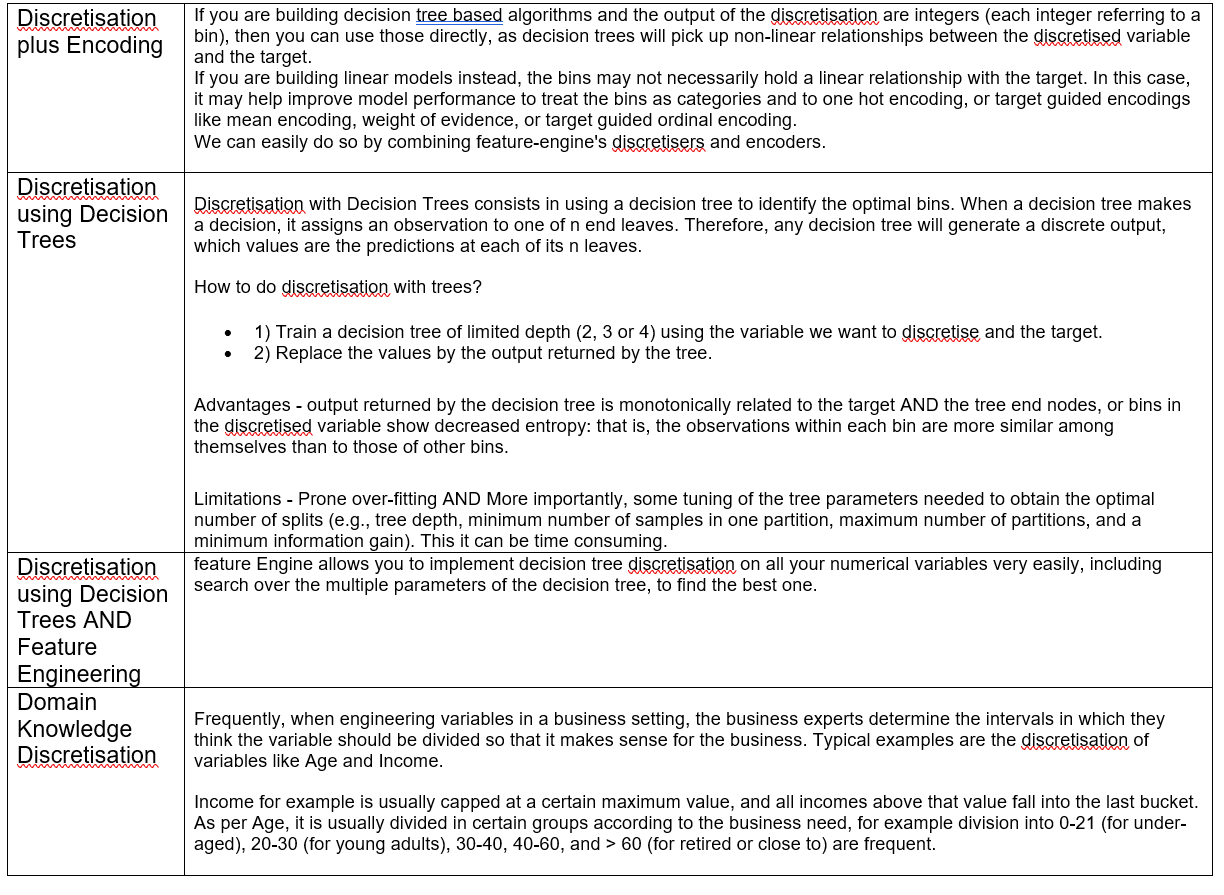

## 4. Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

#### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


#### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)

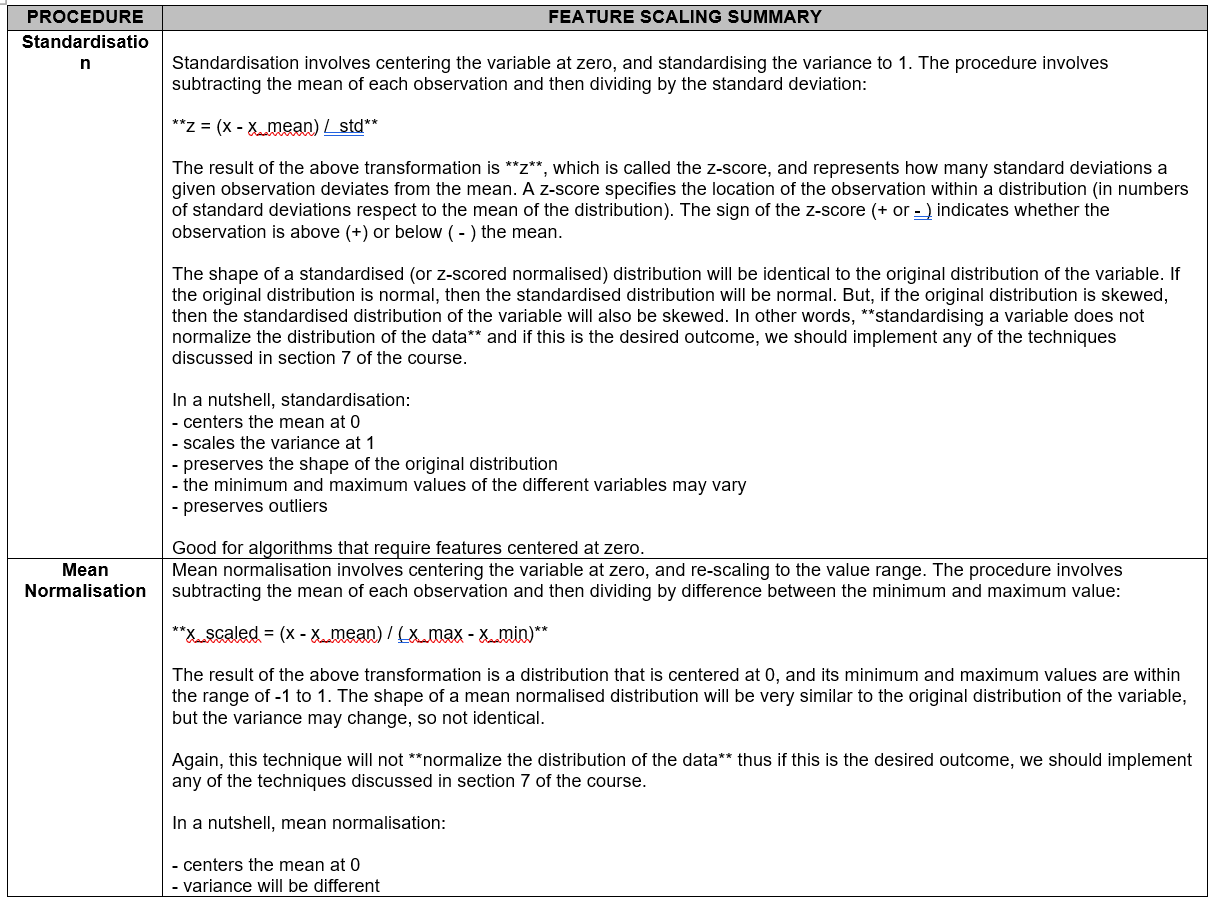

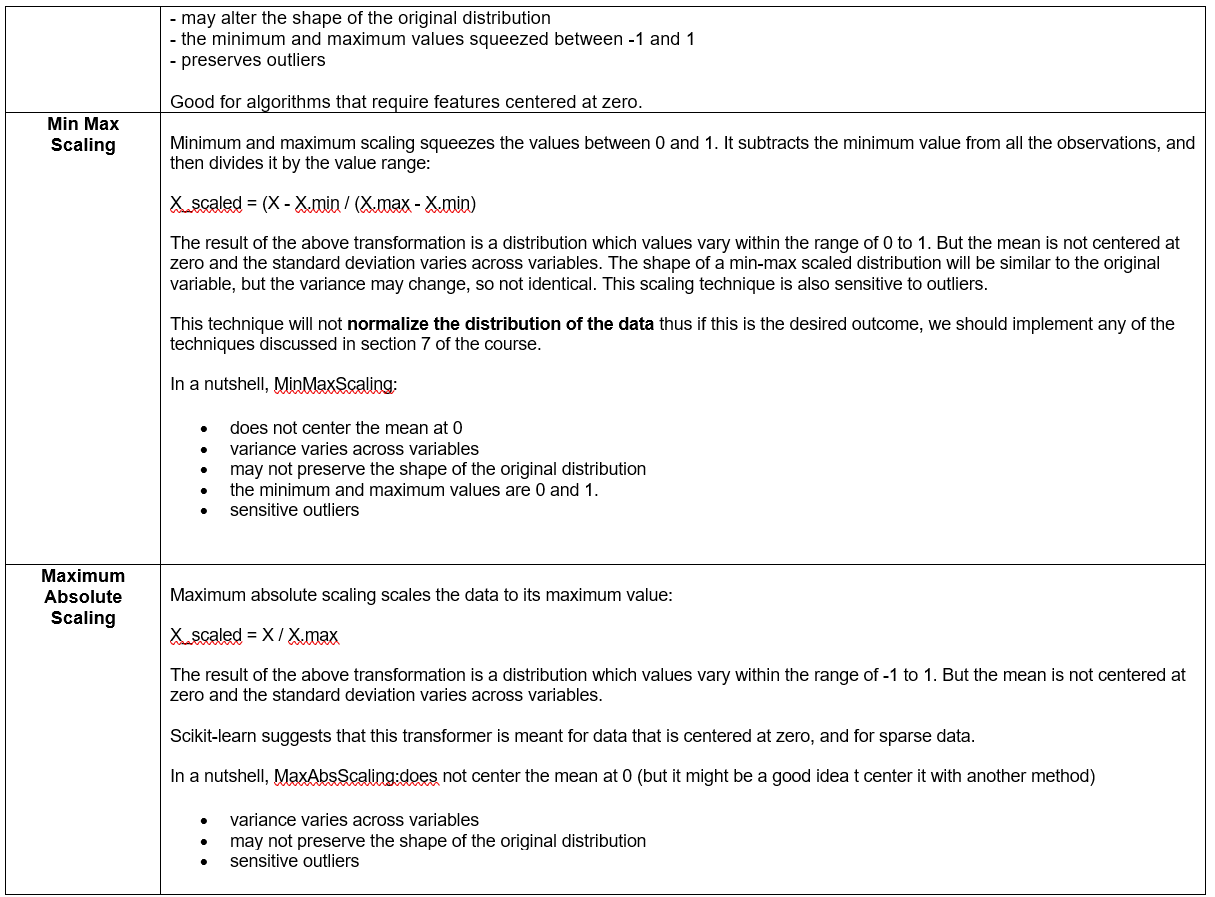

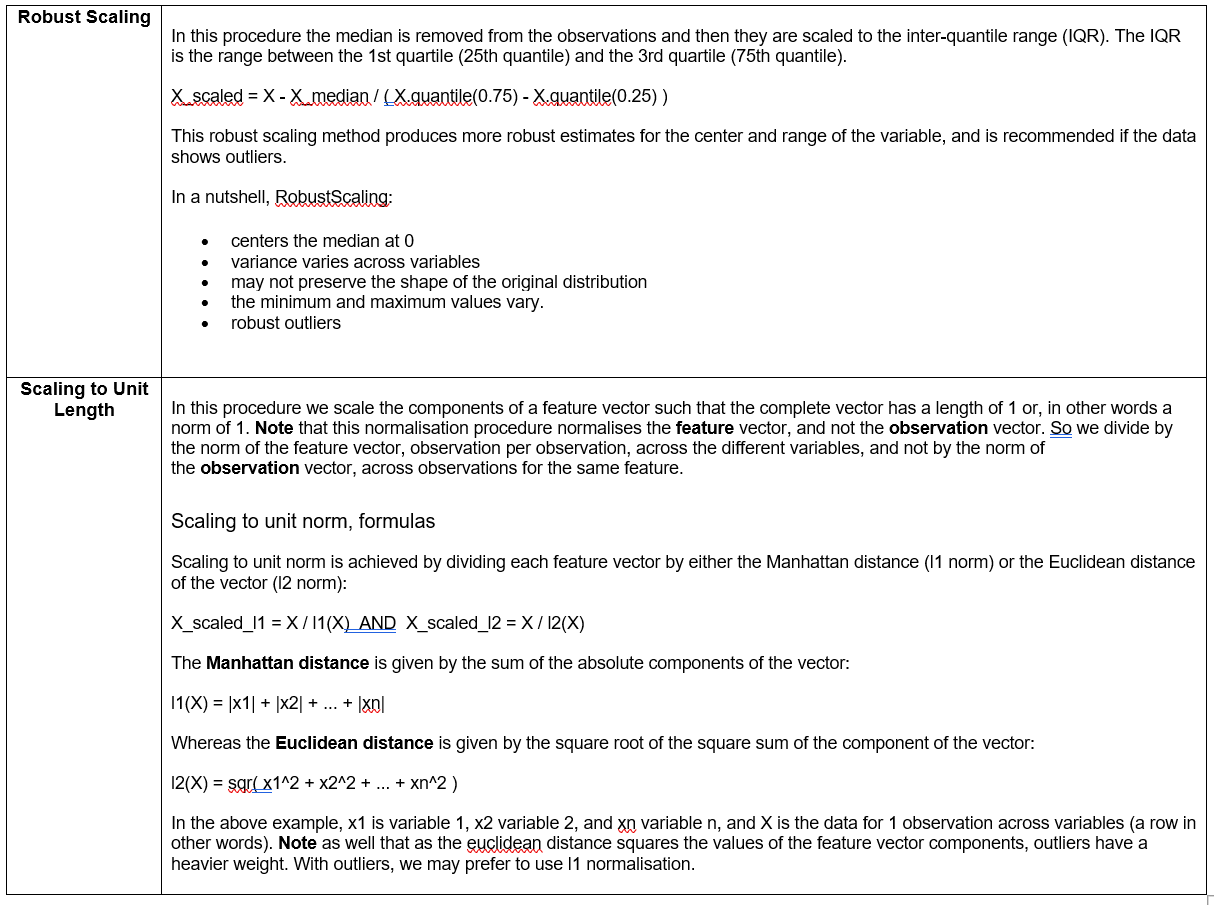

## 5. Engineering Mixed Variables

We've seen that mixed variables are those which values contain both numbers and labels. A mixed variable can contain numbers OR labels in different observations, or numbers AND labels in each observation.

For example, the variable vehicle registration is an example of letters and numbers combined in each observation (e.g.,  NK11DGX), whereas the variable number of missed payments as we covered in section 2, is an example of numbers or labels, where the values can be 0, 1, 2 or 3, or A and D.

### How can we engineer mixed variables?

We can sometimes derive meaningful features by extracting the categorical part in one variable and the numerical part in a different variable. Therefore, we obtain 2 variables from the original one. Then we proceed with the derived variables as we would do with any categorical or numerical variable.

In [ ]:
# In the titles column there are "Reasons/Departments" specified before the title code. Separate it out (EMS: BACK PAINS/INJURY)
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

### Engineering Dates

Date variables are special type of categorical variable. By their own nature, date variables will contain a multitude of different labels, each one corresponding to a specific date and sometimes time. Date variables, when preprocessed properly can highly enrich a dataset. For example, from a date variable we can extract:

- Week of the year
- Month
- Quarter
- Semester
- Year
- Day (number)
- Day of the week
- Is Weekend?
- Time differences in years, months, days, hrs, etc.

Date variables should not be used as categorical variables when building a machine learning model. Not only because they have a multitude of categories, but also because when we actually use the model to score a new observation, this observation will most likely be in the future, an therefore its date label, might be different from the ones contained in the training set and therefore the ones used to train the machine learning algorithm.

### Engineering Time

In this demo, we are going to extract different ways of representing time from a timestamp. We can extract for example:

- hour
- minute
- second
- data
- elapsed time


In [ ]:
# TIME STAMPS for date/ time columns
# Use pd.to_datetime to convert the column from strings to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# create new columns
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

# Notice how the Day of Week is an integer 0-6. 
# Use the .map() with this dictionary to map the actual string names to the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)